In [16]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Importing dataset

ds = pd.read_csv("Social_network_Ads.csv")

In [18]:
ds.duplicated().sum()

np.int64(33)

In [19]:


ds.drop_duplicates(inplace = True)

In [20]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
# Split data as Independent and Dependent variable

X = ds[["Age","EstimatedSalary"]]
y = ds[["Purchased"]]

In [22]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
# Model Selection and Model Fitting with train test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 ,random_state = 0)

In [24]:
# Applying Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
cls.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Predict for my input

result = cls.predict(sc.transform([[30, 150000]]))
result

array([1])

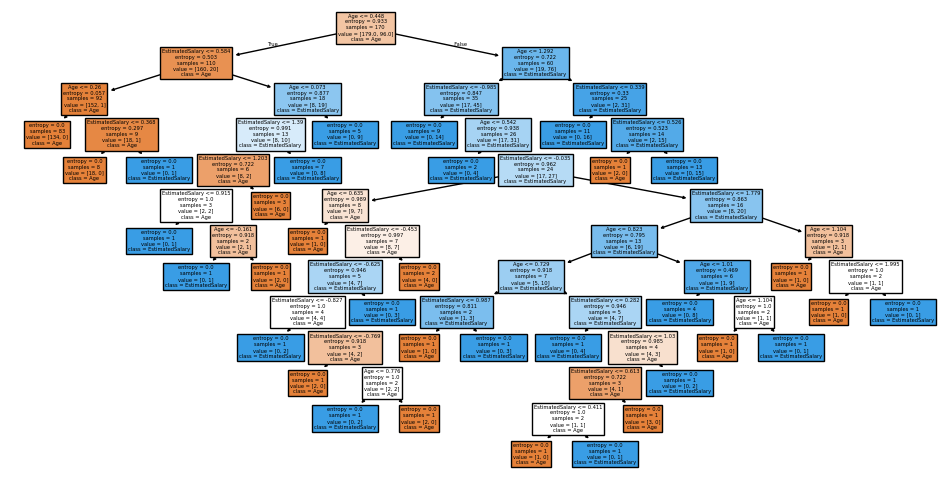

In [26]:
# Plot the graph of random forest algorithm

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(cls.estimators_[0], filled=True, feature_names=['Age','EstimatedSalary'], class_names=['Age','EstimatedSalary'])
plt.show()
                                                          

In [27]:
# finding(cheaking) accuracy for Random forest classification

from sklearn.metrics import accuracy_score

y_pred = cls.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.13%


In [15]:
# User Input

age = float(input("Enter Age: "))
salary = float(input("Enter Estimated Salary: "))

myinput = pd.DataFrame(sc.transform([[age, salary]]), columns=['Age', 'EstimatedSalary'])

result = cls.predict(myinput)

if result[0] == 1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter Age:  20
Enter Estimated Salary:  12000


Prediction: User will not purchase plan
